In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, make_scorer

from sklearn.model_selection import GridSearchCV


In [2]:
#Import Data
train = pd.read_csv('/Users/Nika/Desktop/Data Engineering/data-engineering-data-science-group-a/train_data.csv')
test = pd.read_csv('/Users/Nika/Desktop/Data Engineering/data-engineering-data-science-group-a/test_data.csv')

In [3]:
#Save Passengers Ids for Future 
passenger_ids = test['PassengerId'].copy()


In [4]:
# Dropping duplicates 
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

/Users/Nika/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Missing Data for trained_data')

/Users/Nika/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Users/Nika/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


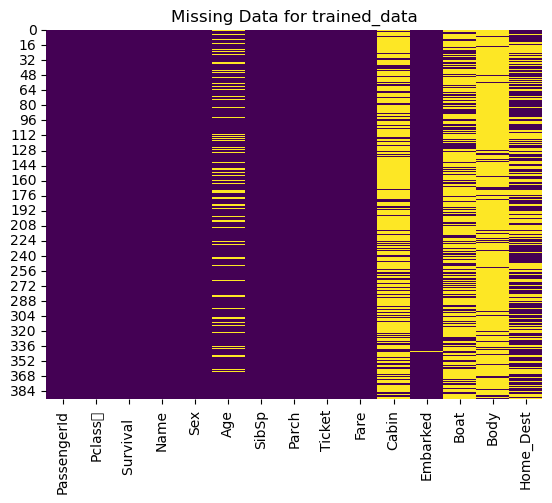

In [5]:
#Finding missing data in visualize
sns.heatmap(test.isnull()
, cbar=False, cmap='viridis')
plt.title('Missing Data for trained_data')

/Users/Nika/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Missing Data for trained_data')

/Users/Nika/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Users/Nika/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


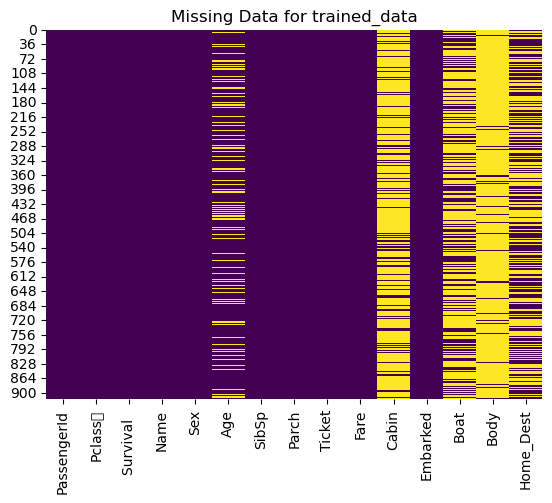

In [6]:
sns.heatmap(train.isnull()
, cbar=False, cmap='viridis')
plt.title('Missing Data for trained_data')

In [7]:
#Filling missing values and removing columns that arent neccessary
train['Age'].fillna(train["Age"].median(), inplace=True)
test['Age'].fillna(test["Age"].median(), inplace=True)

In [8]:
cols_to_drop = ["Home_Dest", "Body", "Boat"]
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [9]:
#Filling and mapping Embarked
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)

In [10]:
#Filling missing Data
train["Cabin"].fillna(train["Cabin"].mode()[0], inplace=True)
test["Cabin"].fillna(test["Cabin"].mode()[0], inplace=True)
train["Fare"].fillna(train["Fare"].median(), inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)

In [11]:
#Removing unnessesary spaces
train.columns = train.columns.str.strip()
test.columns  = test.columns.str.strip()

In [12]:
#Extracting Mr,Mrs,Ms and other Titles from names and dropping names
train["Title"] = train["Name"].str.extract(r'([A-Za-z]+)\.', expand=False)
test["Title"]  = test["Name"].str.extract(r'([A-Za-z]+)\.', expand=False)
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)


In [13]:
#Encoding of titles
title_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, 
    "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,
    "Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3,
    "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3
}
train["Title"] = train["Title"].map(title_mapping).fillna(3)
test["Title"]  = test["Title"].map(title_mapping).fillna(3)

In [14]:
#Downsizing Cabin to single alphabet and encoding 
train["Cabin"] = train["Cabin"].str[:1]
test["Cabin"]  = test["Cabin"].str[:1]
cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}
train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin']  = test['Cabin'].map(cabin_mapping)

In [15]:
# mapping sex
sex_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex']  = test['Sex'].map(sex_mapping)

# Drop Ticket column if not useful
train.drop("Ticket", axis=1, inplace=True)
test.drop("Ticket", axis=1, inplace=True)

In [16]:
# creating new column familySize abd isAlone in both datasets 
for df in [train, test]:
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

In [17]:
# Removing SibSp and Parch as they are already included in FamilySize
train.drop(columns=["SibSp", "Parch"], inplace=True)
test.drop(columns=["SibSp", "Parch"], inplace=True)

# (Optional) Drop duplicates again if needed
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [18]:
print("Duplicated rows in train:", train.duplicated().sum())
print("Duplicated rows in test:", test.duplicated().sum())


Duplicated rows in train: 0
Duplicated rows in test: 0


In [19]:
#building countplot function for future using
def plot_building(data, title):
    ax = sns.countplot(x="Survival", data=data)
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3,
                f'{height/total*100:.1f}%',
                ha="center", fontsize=12)
    plt.title(title)
    plt.xlabel("Survival Status")
    plt.ylabel("Count")
    plt.show()

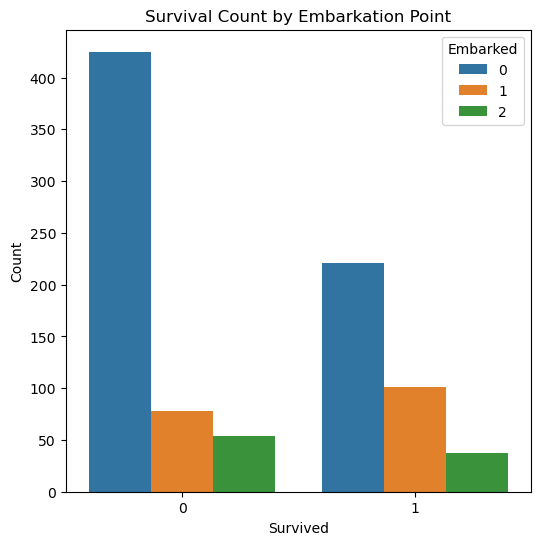

In [20]:
#Survival by Embarked 
plt.figure(figsize=(6, 6))
sns.countplot(x='Survival', hue='Embarked', data=train)
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Embarked')
plt.show()

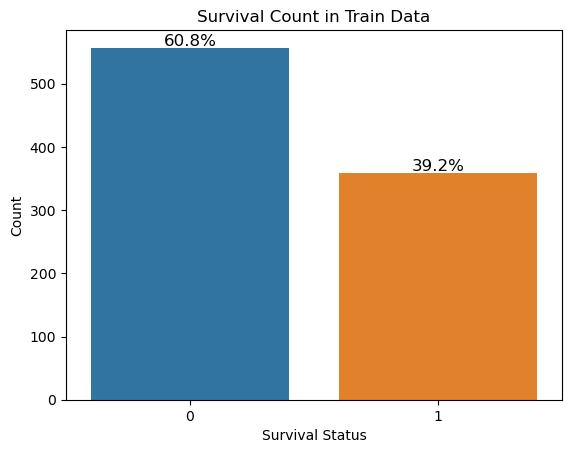

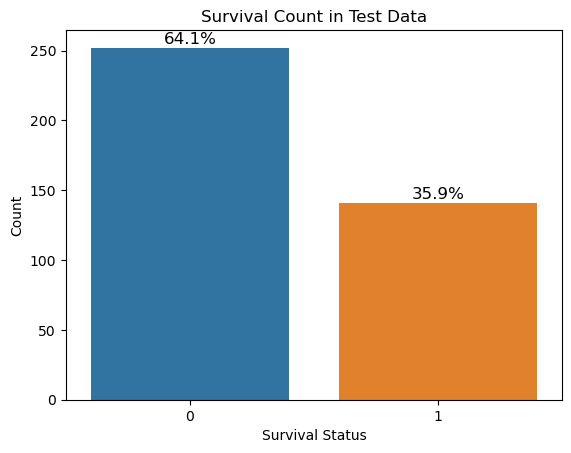

In [21]:
plot_building(train, "Survival Count in Train Data")
plot_building(test, "Survival Count in Test Data")


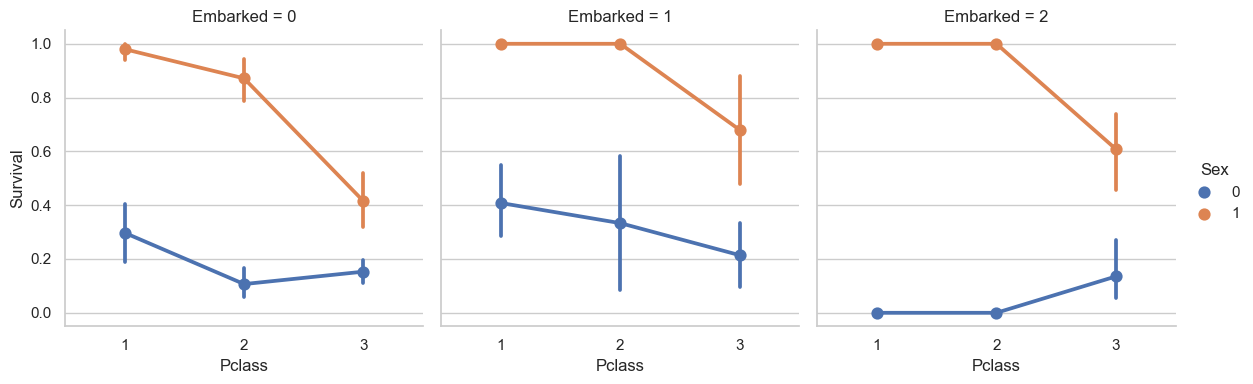

In [22]:
#Sruvival by class in different sex
sns.set(style="whitegrid")
g = sns.catplot(
    data=train, x='Pclass', y='Survival', hue='Sex',
    col='Embarked', kind='point', height=4, aspect=1
)
g.set_titles("Embarked = {col_name}")
plt.show()

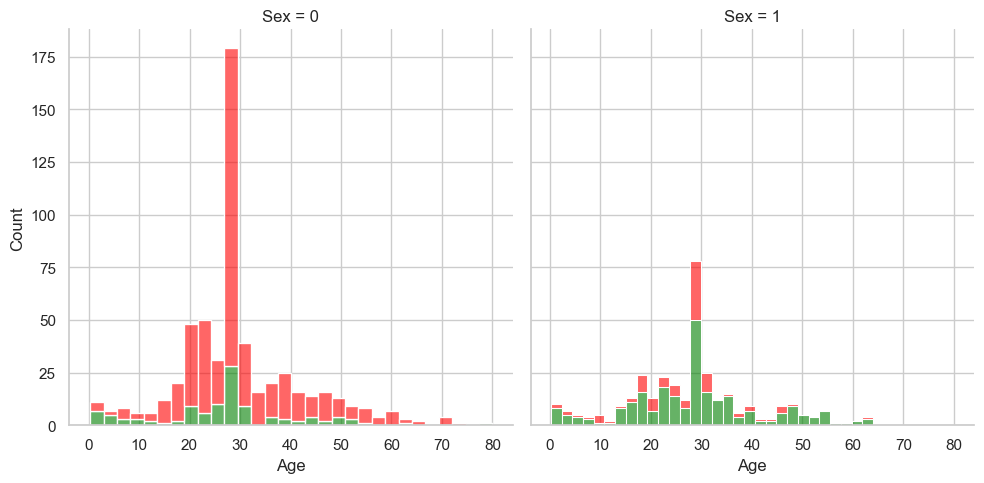

In [23]:
#Survival count for male and female sex in different age sets
g = sns.FacetGrid(train, col='Sex', height=5, aspect=1)


g.map_dataframe(
    sns.histplot, x='Age', hue='Survival', multiple='stack',
    palette={1: 'green', 0: 'red'}, bins=30, alpha=0.6
)
plt.show()

In [24]:
test

,PassengerId,Pclass,Survival,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,917,3,0,1,30.0,14.4583,2,1,2,2,0
1,918,2,0,0,26.0,13.0000,5,0,0,1,1
2,919,1,1,1,29.0,221.7792,2,0,1,1,1
3,920,2,1,1,36.0,13.0000,2,0,1,1,1
4,921,3,1,1,22.0,13.9000,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
388,1305,3,0,0,42.0,7.6500,5,0,0,1,1
389,1306,3,0,0,17.0,7.8958,2,0,0,1,1
390,1307,1,0,0,40.0,0.0000,1,0,0,1,1
391,1308,3,0,1,9.0,31.2750,2,0,1,7,0


In [25]:
#Finding Outliers
def cap_outliers(df):
    for col in ["Age","Fare"]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))
    return df

In [26]:
train = cap_outliers(train)
test = cap_outliers(test)

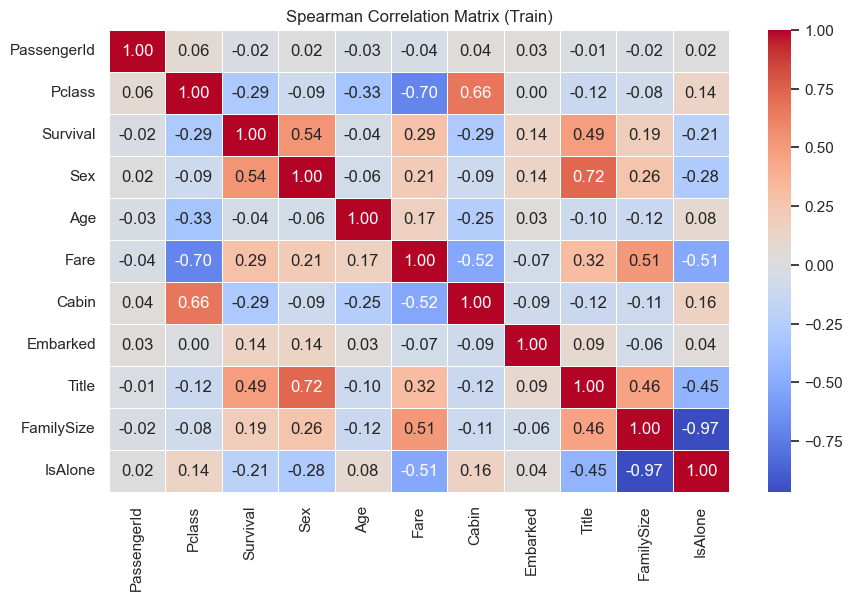

Survival       1.000000
Sex            0.535770
Title          0.487064
Fare           0.285180
FamilySize     0.186974
Embarked       0.142149
PassengerId   -0.015261
Age           -0.040708
IsAlone       -0.211680
Pclass        -0.287439
Cabin         -0.293653
Name: Survival, dtype: float64


In [27]:
#Sperman Correlation
spearman_corr = train.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Matrix (Train)")
plt.show()
print(spearman_corr["Survival"].sort_values(ascending=False))

In [28]:
#Dropping Cabin,Embarked,IsAlone and PassengerId since correlation is low
for df in [train, test]:
    df.drop(["Cabin", "Embarked"], axis=1, inplace=True)

In [29]:
train.drop(["IsAlone"],axis=1,inplace=True)
test.drop(["IsAlone"],axis=1,inplace=True)

In [30]:
train.drop(["PassengerId"],axis=1,inplace=True)
test.drop(["PassengerId"],axis=1,inplace=True)

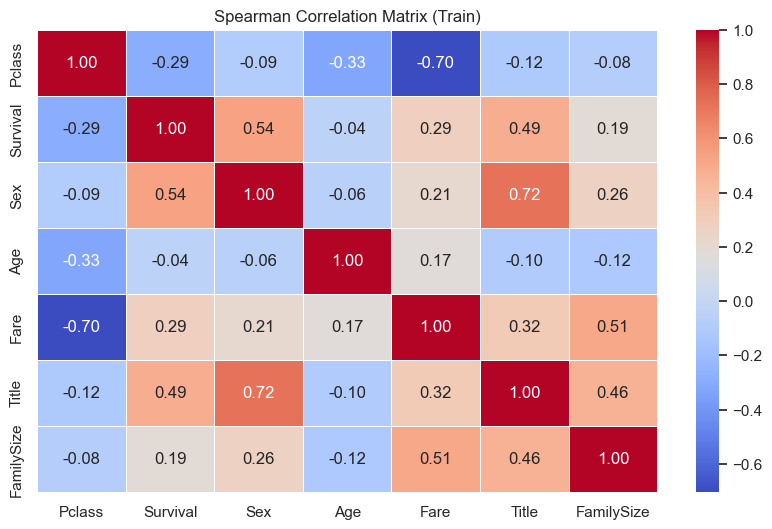

Survival      1.000000
Sex           0.535770
Title         0.487064
Fare          0.285180
FamilySize    0.186974
Age          -0.040708
Pclass       -0.287439
Name: Survival, dtype: float64


In [31]:
#Redoing Sperman Correlation
spearman_corr = train.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Matrix (Train)")
plt.show()
print(spearman_corr["Survival"].sort_values(ascending=False))

In [32]:
X_train = train.drop(columns=['Survival'])
y_train = train['Survival']
X_test  = test.drop(columns=['Survival'])
y_test  = test['Survival']

# Standardize features (for Logistic Regression; XGBoost is less sensitive)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----------------------------
# 9. Model Training & Evaluation
# ----------------------------
# Logistic Regression Baseline
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("--- Logistic Regression Performance ---")
print(f'Accuracy: {accuracy_score(y_test, y_pred_log):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_log):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_log):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_log):.4f}')
print()


--- Logistic Regression Performance ---
Accuracy: 0.8142
Precision: 0.7698
Recall: 0.6879
F1 Score: 0.7266



In [33]:
xgb = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=1.2,
    learning_rate=0.05,
    max_depth=4,
    n_estimators=200,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("--- XGBoost Performance ---")
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_xgb):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_xgb):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_xgb):.4f}')
print()

--- XGBoost Performance ---
Accuracy: 0.8346
Precision: 0.8167
Recall: 0.6950
F1 Score: 0.7510



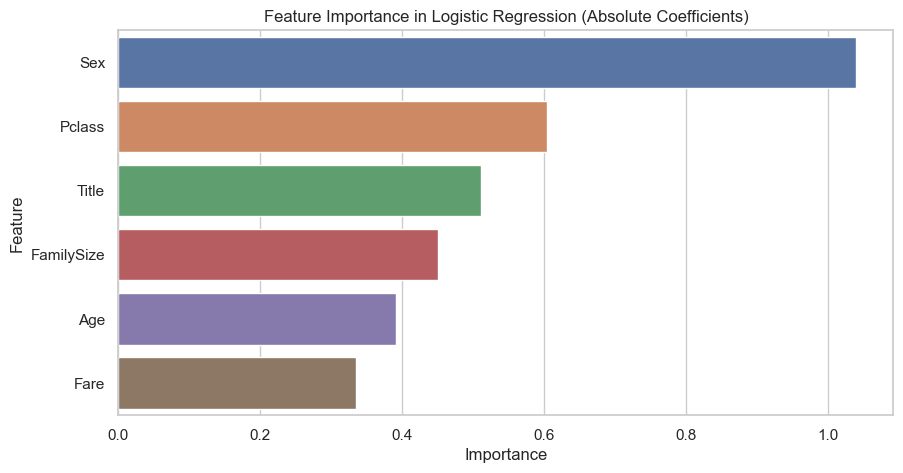

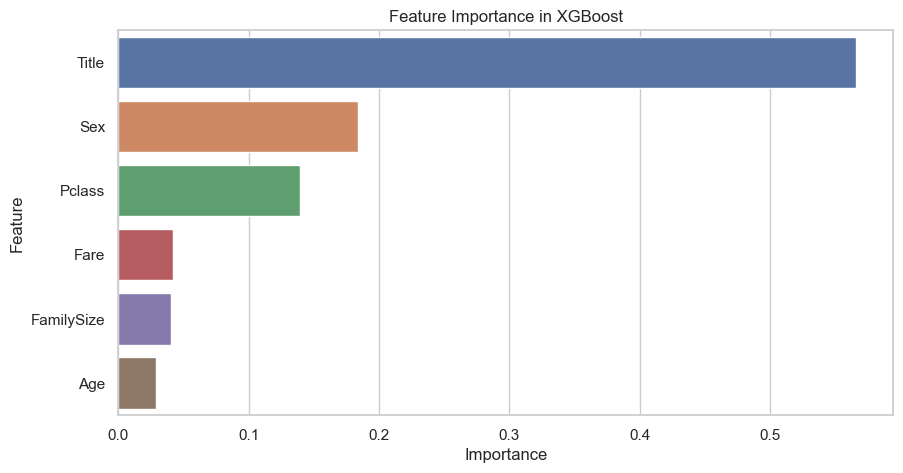

In [34]:
lr_coeff = log_reg.coef_[0]
feature_importances_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_coeff
})
feature_importances_lr['Importance'] = feature_importances_lr['Coefficient'].abs()
feature_importances_lr = feature_importances_lr.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances_lr)
plt.title('Feature Importance in Logistic Regression (Absolute Coefficients)')
plt.show()

# For XGBoost
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in XGBoost')
plt.show()

In [78]:
submission = pd.DataFrame({'PassengerId': passenger_ids, 'Survival': y_pred_xgb})
submission.to_csv('submission17.csv', index=False)